In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import scipy.fftpack as fft
from scipy import fromstring, int16, frombuffer
import soundfile as sf
import wave
import struct
import random



In [17]:
#coding:utf-8
import wave
import numpy as np
import matplotlib.pyplot as plt
import random

def wave_load(filename):
    # open wave file
    wf = wave.open(filename,'r')
    channels = wf.getnchannels()

    # load wave data
    chunk_size = wf.getnframes()
    amp  = (2**8) ** wf.getsampwidth() / 2
    data = wf.readframes(chunk_size)   # バイナリ読み込み
    data = np.frombuffer(data,'int16') # intに変換
    data = data / amp                  # 振幅正規化
    data = data[::channels]
   
    return data


def fft_load(count,instrument,size,start,end):
    '''
    count = グラフに入れたい数
    instrument = 楽器のディレクトリ
    size = FFTのサンプル数（２＊＊ｎ）
    start　=乱数の開始位置
    end = 乱数の終点位置

    '''
    st = 10000   # サンプリングする開始位置
    hammingWindow = np.hamming(size)    # ハミング窓
    #fs = 44100 #サンプリングレート
    fs=48000
    d = 1.0 / fs #サンプリングレートの逆数
    freqList = np.fft.fftfreq(size, d)
    
    for i in range(count):
        n = random.randint(start,end)
        #filename = "./" + instrument + "/output/" + str(n) +".wav"
        filename = instrument
        wave = wave_load(filename)
        #windowedData = hammingWindow * wave[st:st+size]  # 切り出した波形データ（窓関数あり）
        #data = np.fft.fft(windowedData)
        data = np.fft.fft(wave[st:st+size])
        data = data / max(abs(data)) # 0~1正規化
        plt.plot(freqList,abs(data))
         
    #plt.axis([0,fs/16,0,1]) #第二引数でグラフのy軸方向の範囲指定
    plt.axis([0,fs/64,0,1]) #第二引数でグラフのy軸方向の範囲指定
    plt.title(instrument)
    plt.xlabel("Frequency[Hz]")
    plt.ylabel("amplitude spectrum")
    plt.show()

    return data

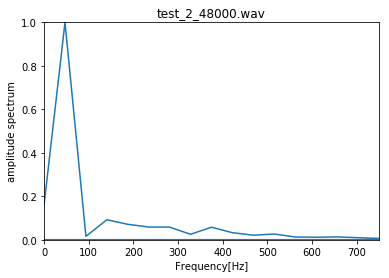

array([ 0.16132919+0.j        ,  0.77499147-0.63197169j,
       -0.01572441+0.00233519j, ...,  0.04656865+0.07956823j,
       -0.01572441-0.00233519j,  0.77499147+0.63197169j])

In [18]:
fft_load(1,"test_2_48000.wav",1024,0,1000)

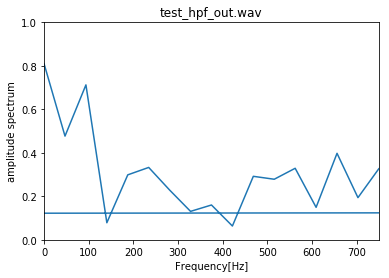

array([ 0.80956002+0.j        , -0.25381781+0.403747j  ,
       -0.27795963-0.65598728j, ..., -0.07806622-0.00772714j,
       -0.27795963+0.65598728j, -0.25381781-0.403747j  ])

In [19]:
fft_load(1,"test_hpf_out.wav",1024,0,1000)